In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [5]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


In [6]:
mainData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
finalgrade = pd.DataFrame(mainData['G3'])
finalgrade.shape

(395, 1)

<AxesSubplot:xlabel='G3', ylabel='count'>

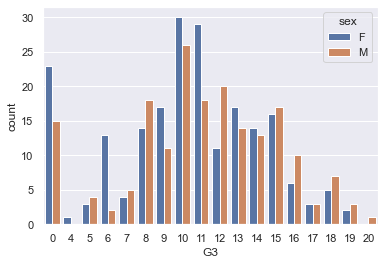

In [8]:
sb.countplot(data=mainData, x="G3", hue="sex")

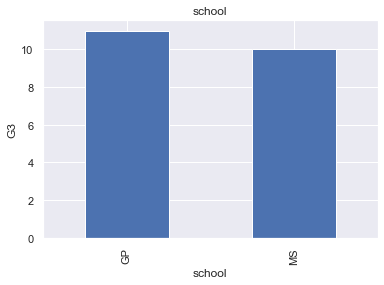

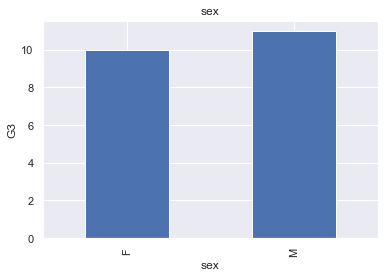

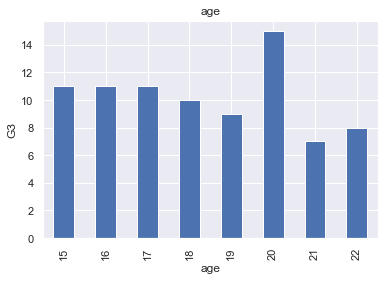

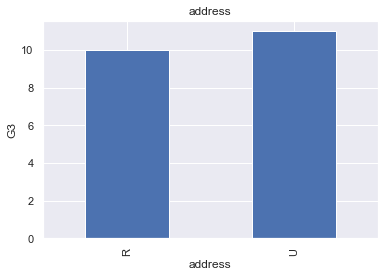

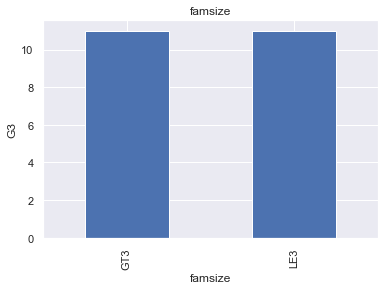

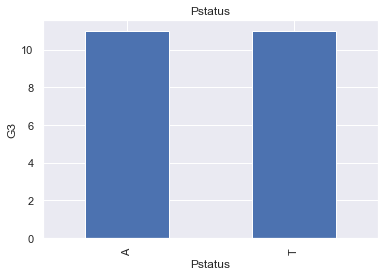

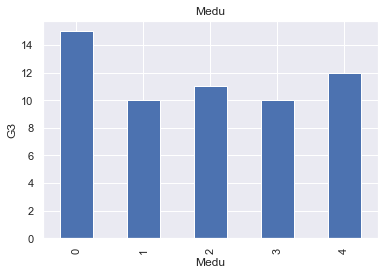

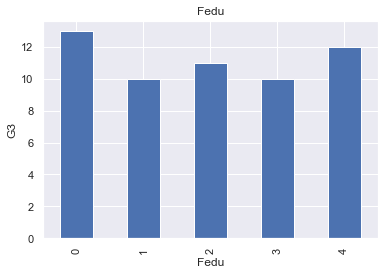

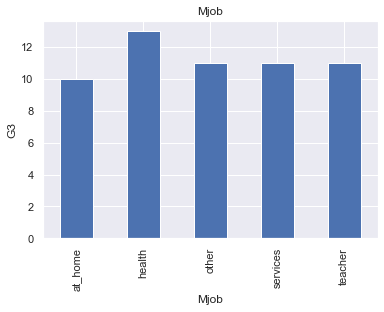

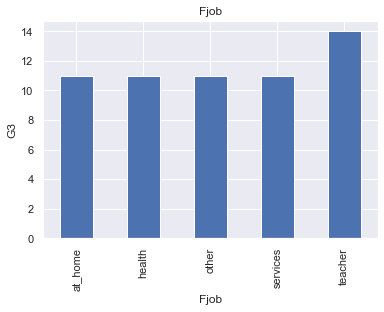

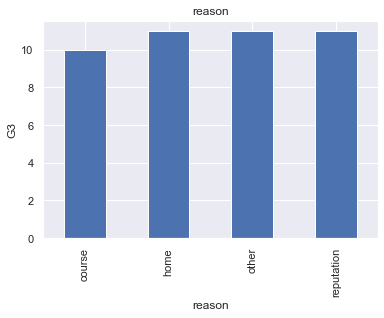

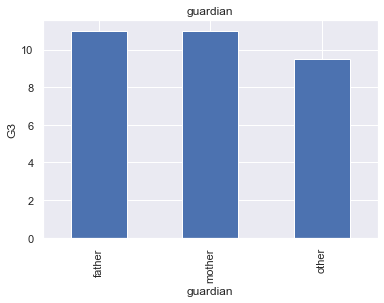

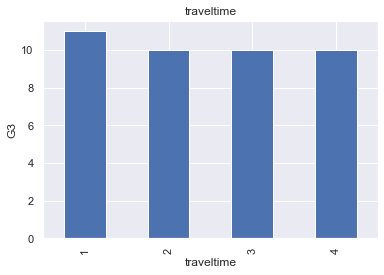

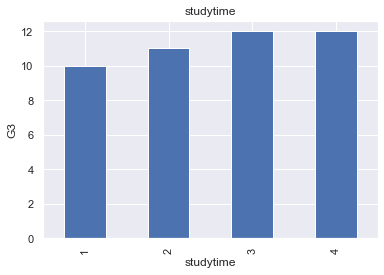

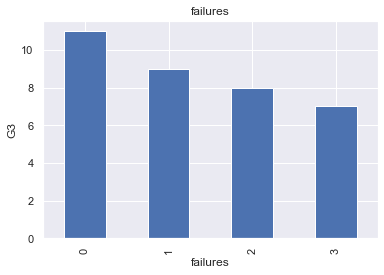

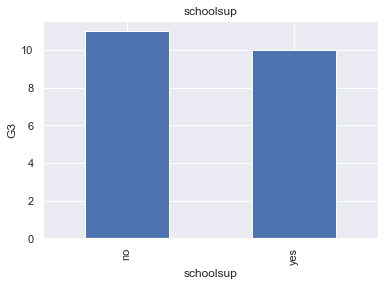

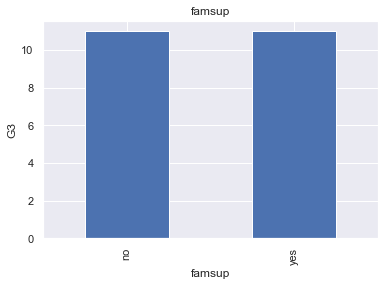

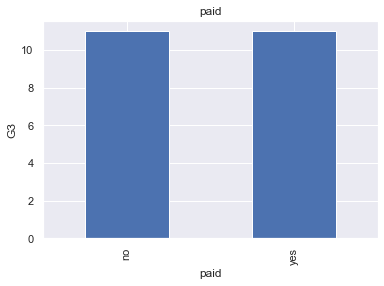

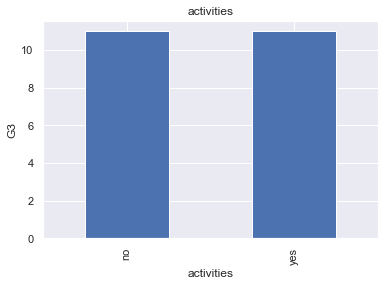

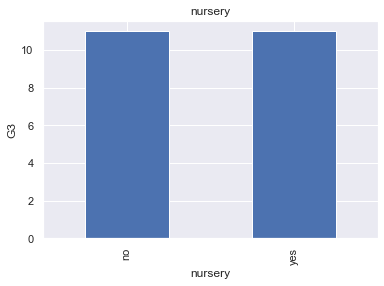

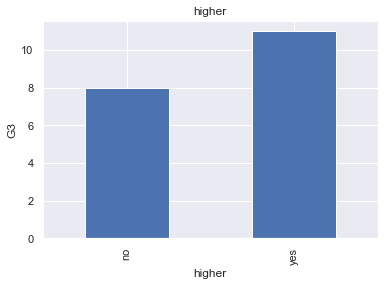

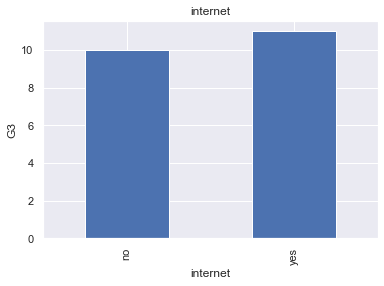

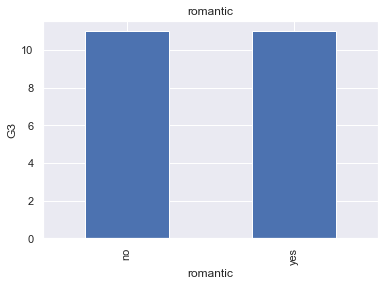

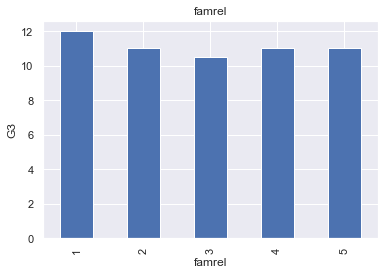

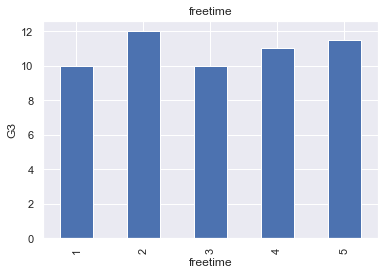

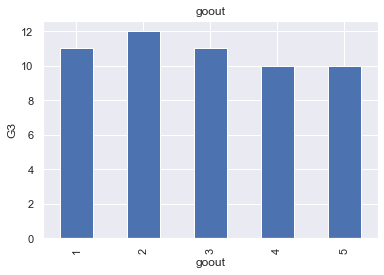

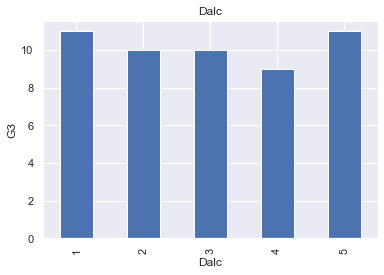

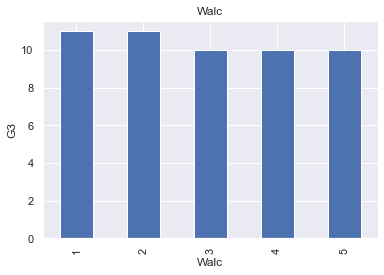

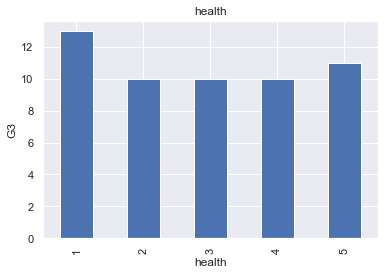

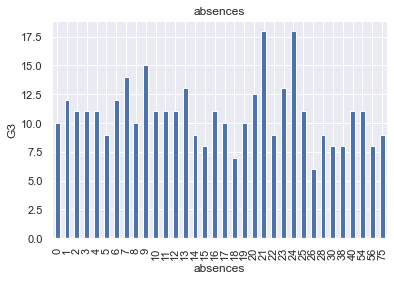

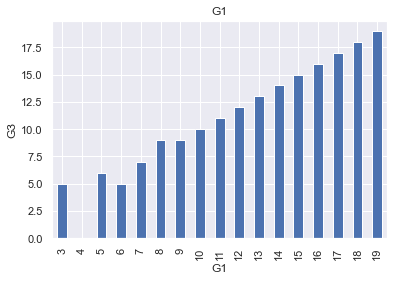

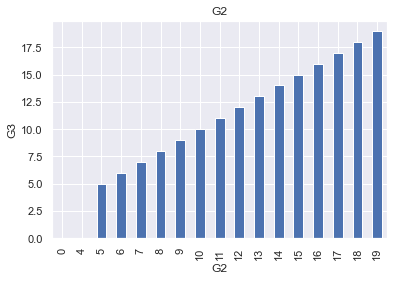

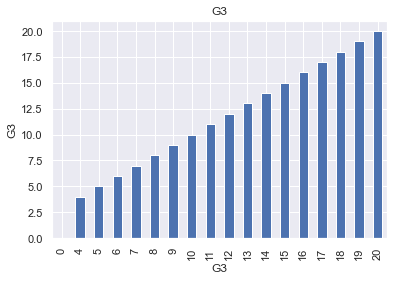

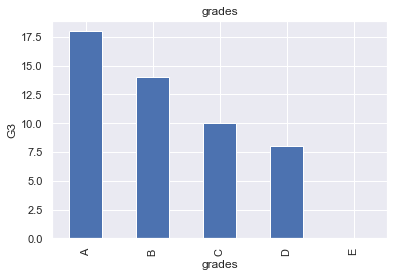

In [9]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

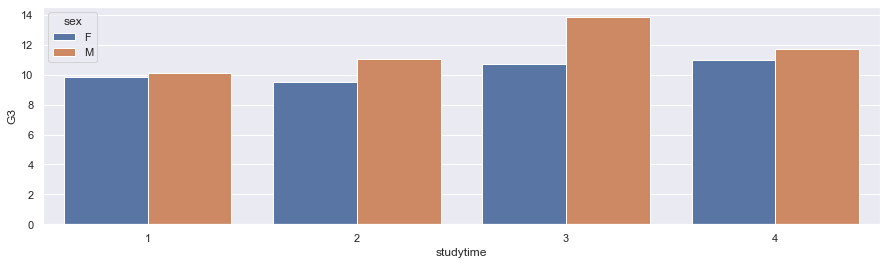

In [10]:
#studytime vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='studytime', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

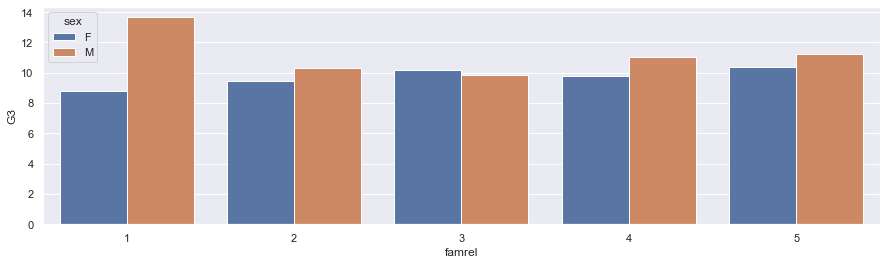

In [11]:
#famrel vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='famrel', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

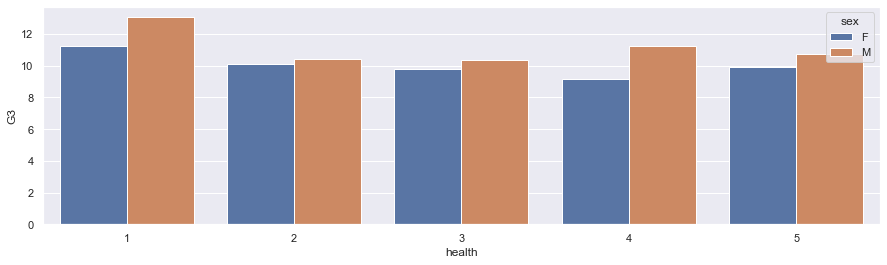

In [12]:
#health vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='health', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

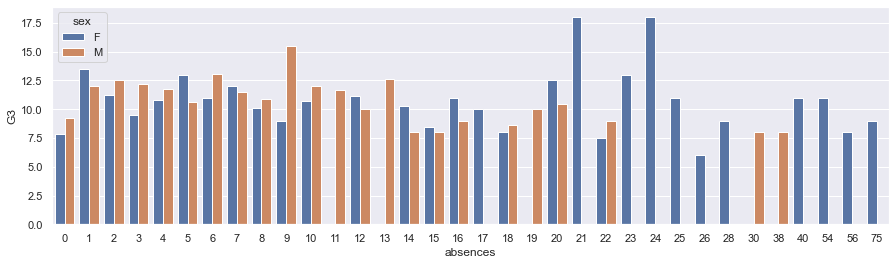

In [13]:
#studytime vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='absences', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

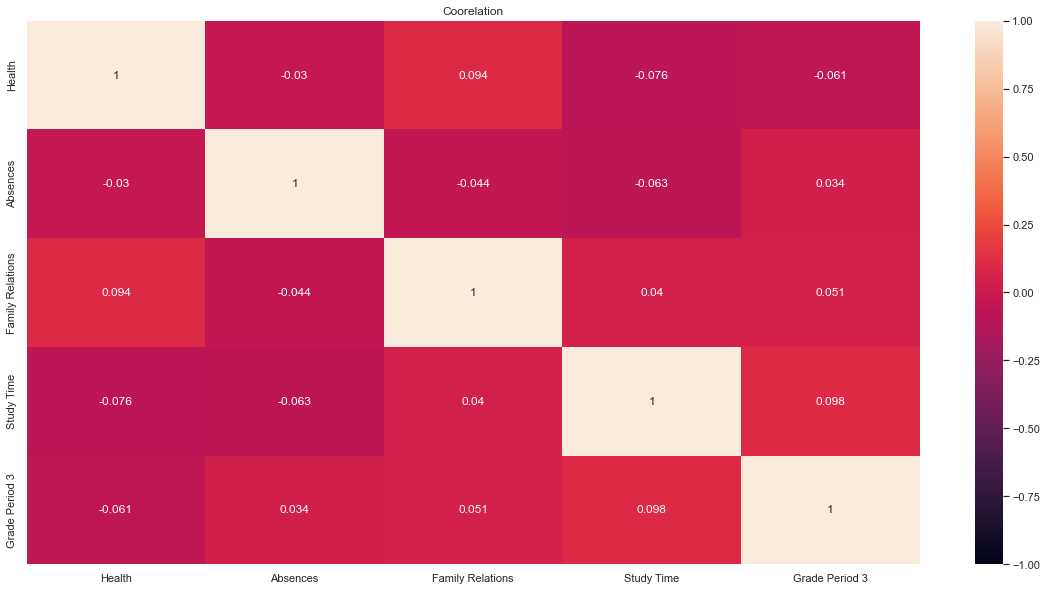

In [14]:
tmp = mainData[['health', 'absences', 'famrel', 'studytime','G3']].corr()
fig, ax = plt.subplots(figsize=(20, 10))
# fig, ax = plt.subplots()
sb.heatmap(data=tmp,vmin = -1, vmax = 1, annot=True)
ax.set_title("Coorelation")
ax.set_xticklabels(("Health", "Absences", "Family Relations", "Study Time", "Grade Period 3"))
ax.set_yticklabels(("Health", "Absences", "Family Relations", "Study Time", "Grade Period 3"))
plt.show()

In [15]:
trial = pd.DataFrame(mainData[["famrel", "freetime", "goout", "Dalc"]])

In [17]:
trial.head()

,famrel,freetime,goout,Dalc
0,4,3,4,1
1,5,3,3,1
2,4,3,2,2
3,3,2,2,1
4,4,3,2,1


In [19]:
sb.set_style='darkgrid'

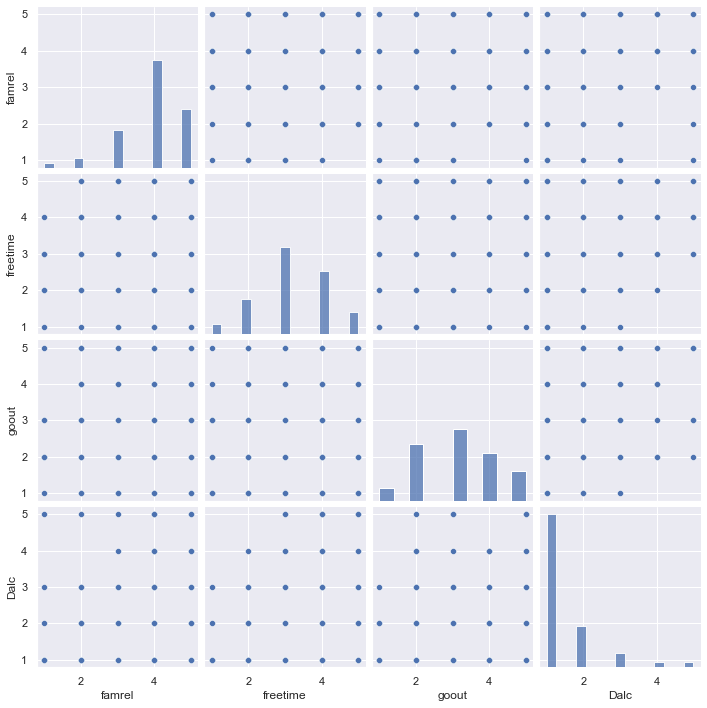

In [20]:
sb.pairplot(trial)

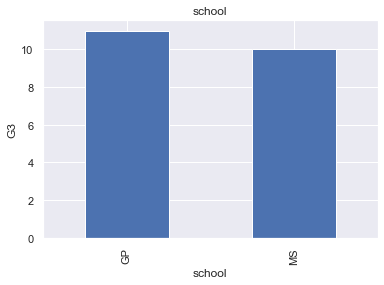

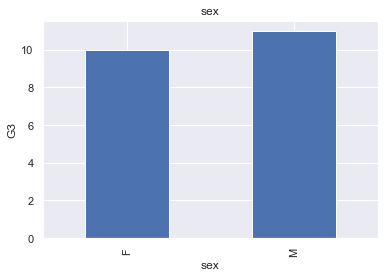

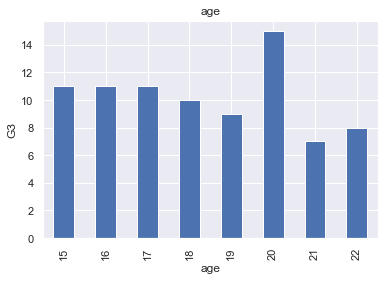

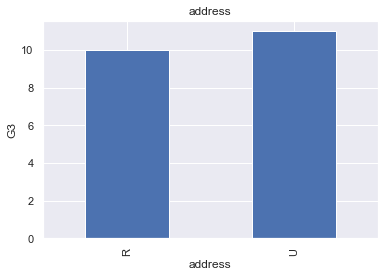

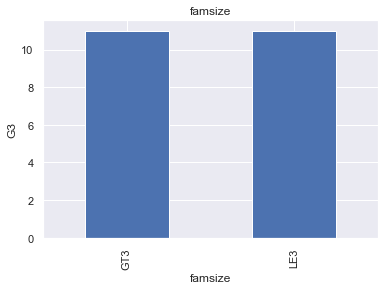

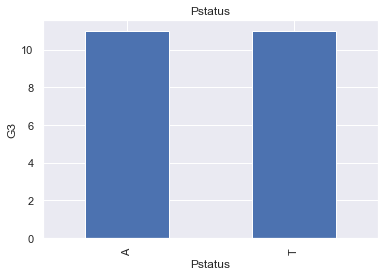

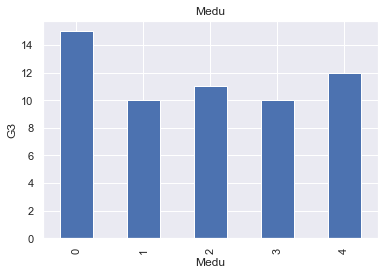

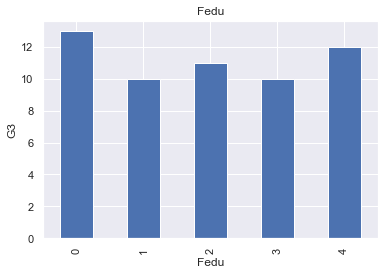

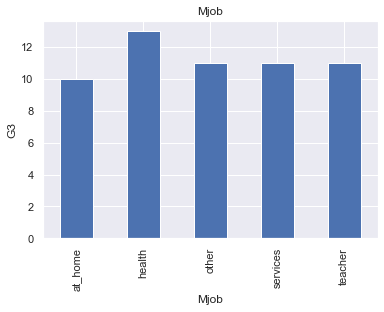

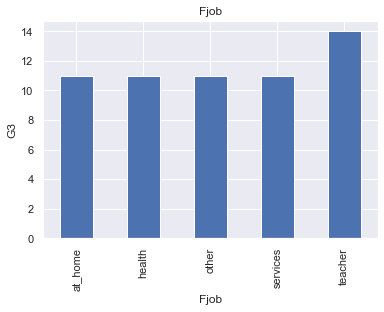

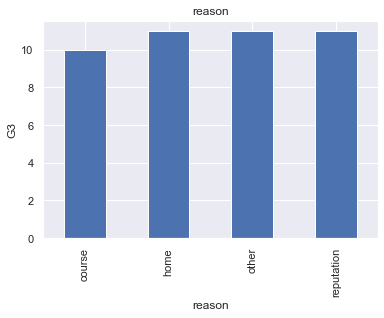

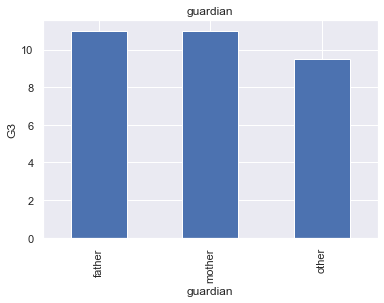

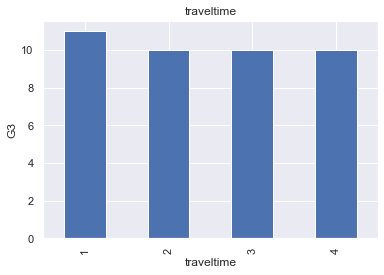

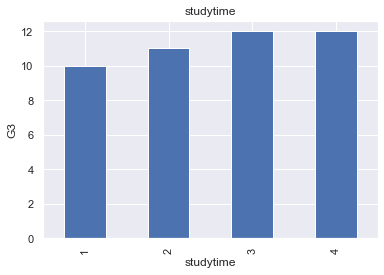

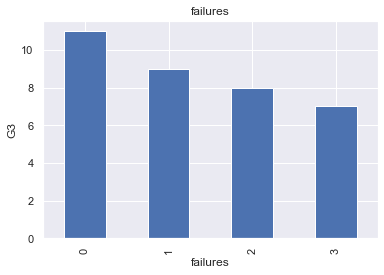

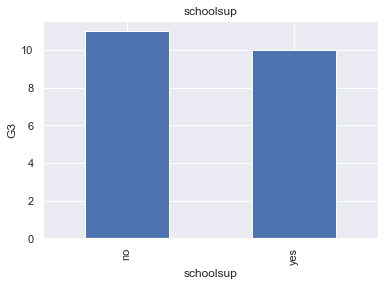

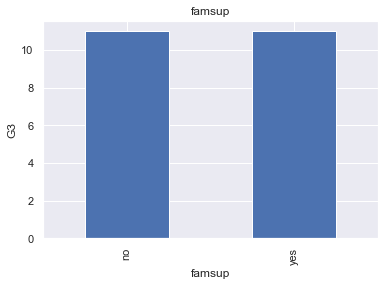

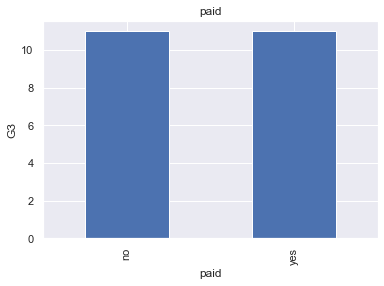

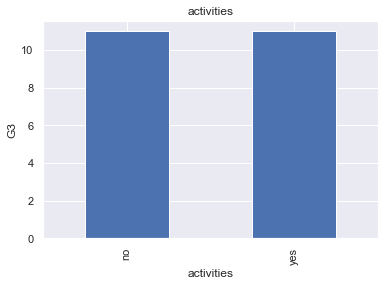

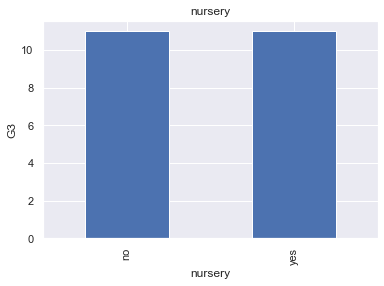

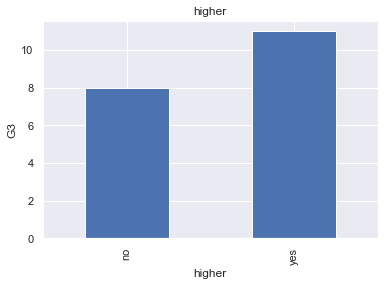

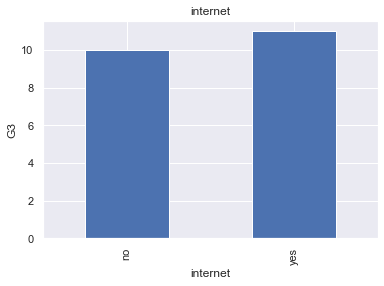

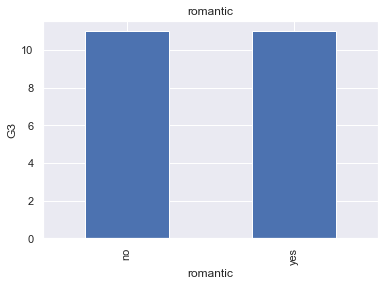

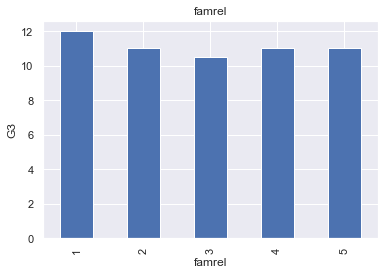

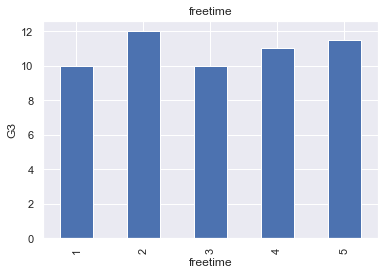

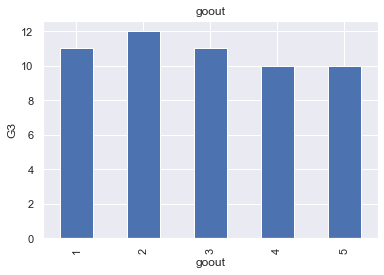

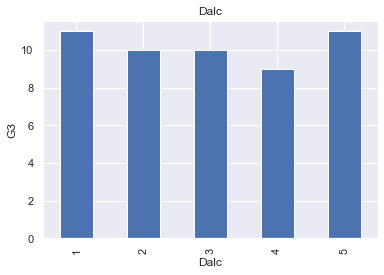

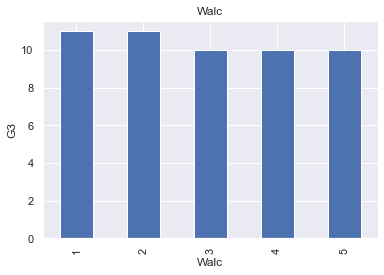

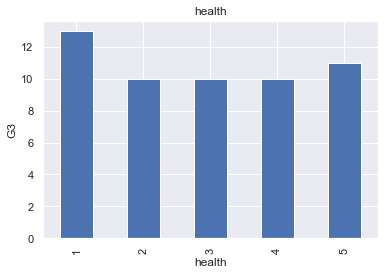

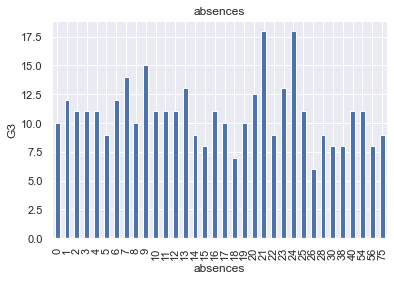

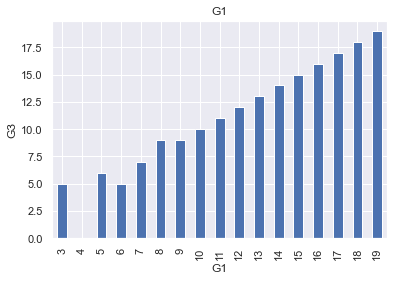

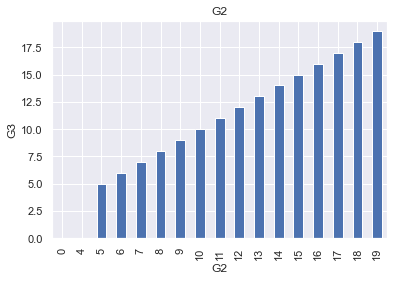

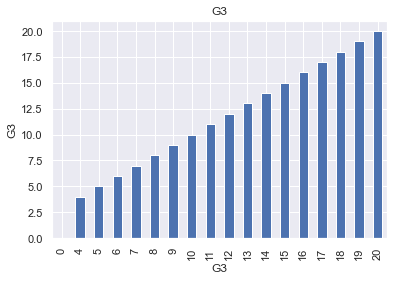

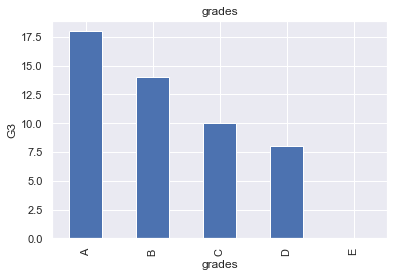

In [21]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

16


<AxesSubplot:>

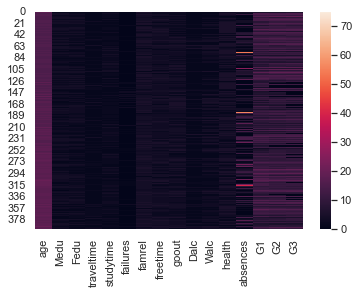

In [22]:
data = mainData.copy()
numerical_features = [
    features for features in data.columns if data[features].dtype != 'O']


print(len(numerical_features))
data[numerical_features].head()
sb.heatmap(data[numerical_features])

In [23]:
# discrete features
discrete_features = [features for features in numerical_features if len(
    data[features].unique()) <= 5]


print(len(discrete_features))
print(discrete_features)
print(data[discrete_features].head())

11
['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
   Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  Dalc  \
0     4     4           2          2         0       4         3      4     1   
1     1     1           1          2         0       5         3      3     1   
2     1     1           1          2         3       4         3      2     2   
3     4     2           1          3         0       3         2      2     1   
4     3     3           1          2         0       4         3      2     1   

   Walc  health  
0     1       3  
1     1       3  
2     3       3  
3     1       5  
4     2       5  


In [24]:
# continous features
continous_features = [
    features for features in numerical_features if features not in discrete_features]

print(len(continous_features))
print(continous_features)
data[continous_features].head()

5
['age', 'absences', 'G1', 'G2', 'G3']


,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10


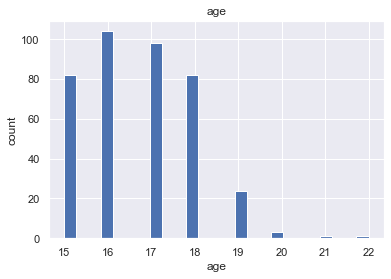

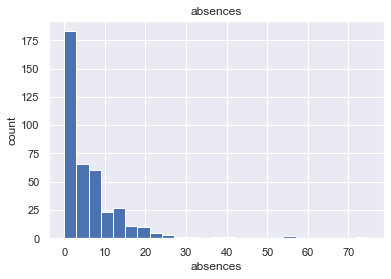

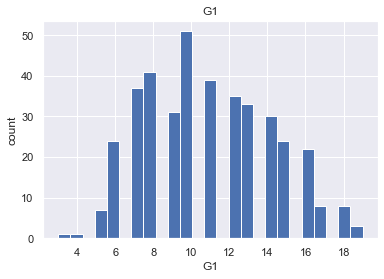

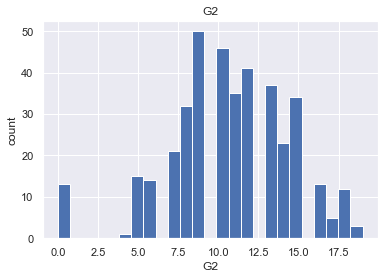

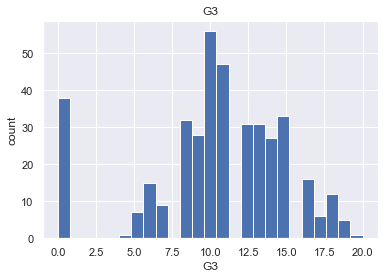

In [25]:
# plotting features to find relaion

for features in continous_features:
    data = mainData.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

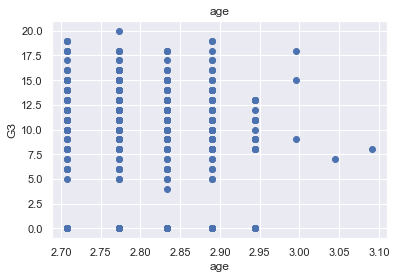

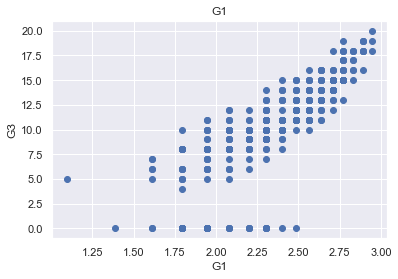

In [26]:
# using lograthmic transformations

for features in continous_features:
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        plt.scatter(data[features], data['G3'])
        plt.xlabel(features)
        plt.ylabel('G3')
        plt.title(features)
        plt.show()

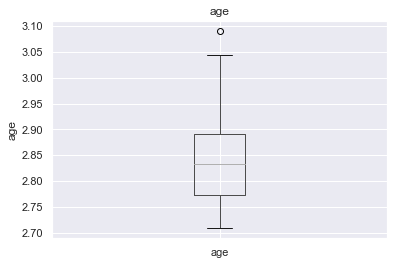

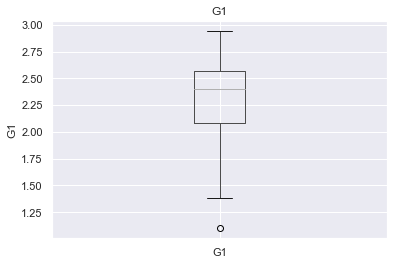

In [27]:
for features in continous_features:  # we use boxplot to find outliers in our data
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [28]:
categorical_features = [
    features for features in mainData.columns if mainData[features].dtype == 'O']
print(len(categorical_features))
mainData[categorical_features].head()

18


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,D
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,D
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,C
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,B
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,C


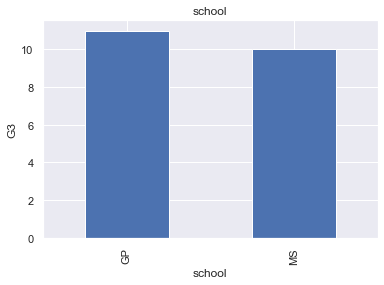

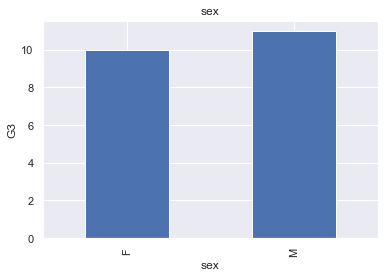

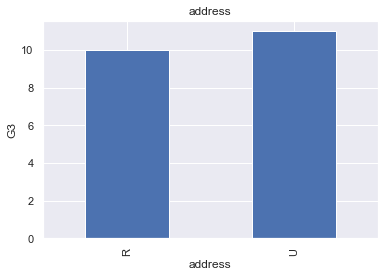

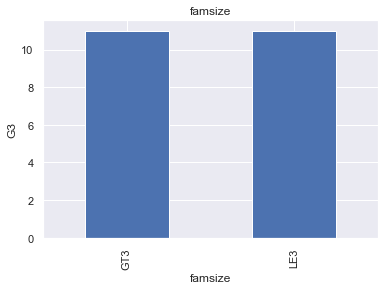

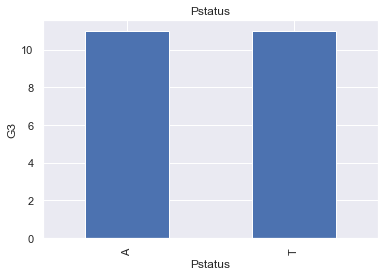

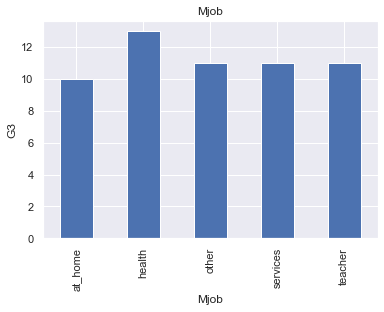

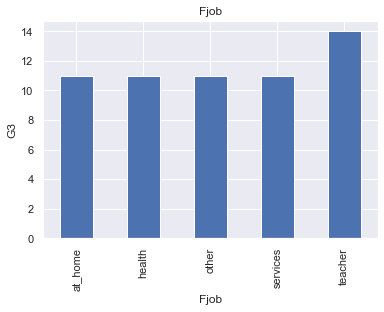

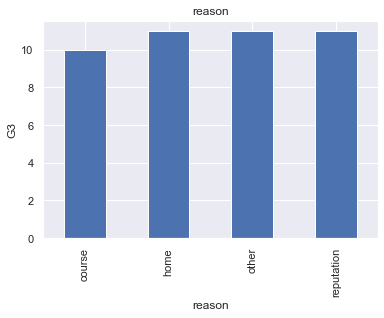

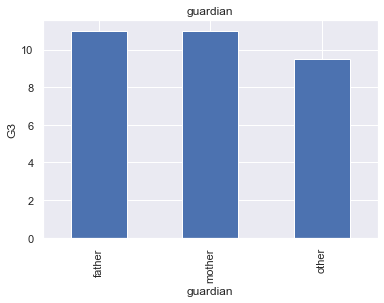

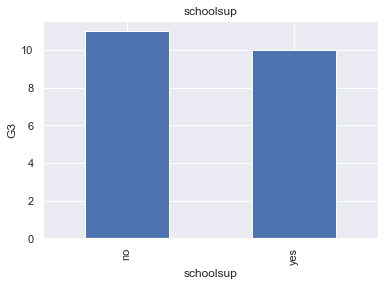

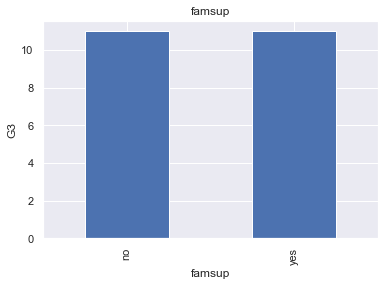

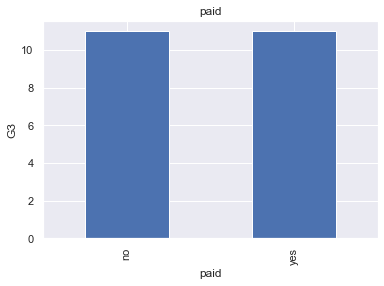

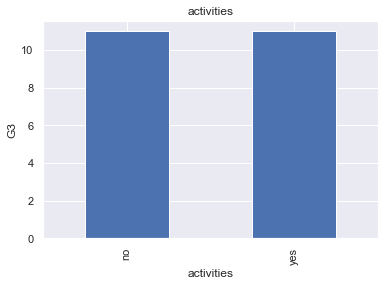

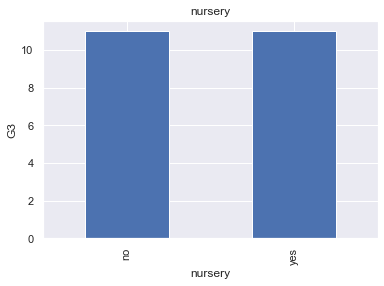

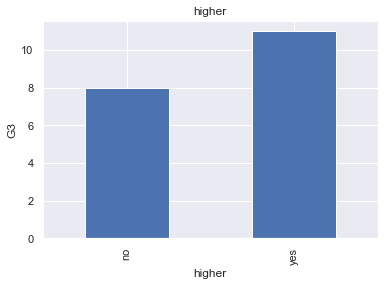

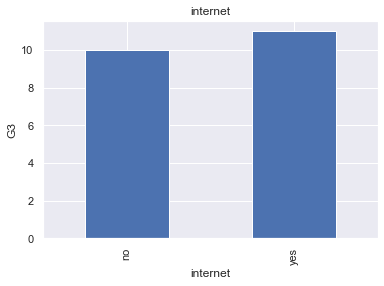

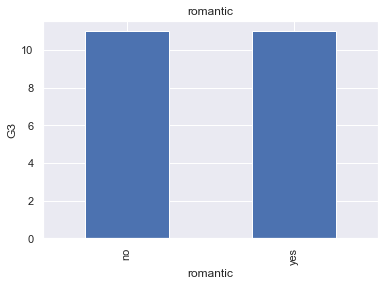

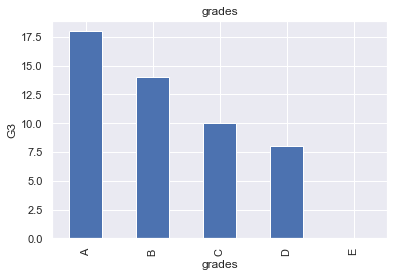

In [29]:
# finding the relationship between categorical variables and dependent variables

for features in categorical_features:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

In [30]:
for feature in categorical_features:
    labels_ordered = mainData.groupby(
        [feature])['G3'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    mainData[feature] = mainData[feature].map(labels_ordered)

mainData[categorical_features].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,1,0,1,0,1,0,4,0,1,0,1,0,0,1,1,0,1,1
1,1,0,1,0,0,0,1,0,2,1,0,0,0,0,1,1,1,1
2,1,0,1,1,0,0,1,3,1,0,1,1,0,1,1,1,1,2
3,1,0,1,0,0,4,2,1,1,1,0,1,1,1,1,1,0,3
4,1,0,1,0,0,1,1,1,2,1,0,1,0,1,1,0,1,2


In [31]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

feature_scale = [
    features for features in mainData.columns if features not in ['G3']]
print(feature_scale)
scalar.fit_transform(mainData[feature_scale])


mainData = pd.concat([mainData[['G3']].reset_index(drop=True), pd.DataFrame(
    scalar.fit_transform(mainData[feature_scale]), columns=feature_scale)], axis=1)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'grades']


In [32]:
print("Data type : ", type(mainData))
print("Data dims : ", mainData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (395, 34)


In [33]:
print(mainData.dtypes)

G3              int64
school        float64
sex           float64
age           float64
address       float64
famsize       float64
Pstatus       float64
Medu          float64
Fedu          float64
Mjob          float64
Fjob          float64
reason        float64
guardian      float64
traveltime    float64
studytime     float64
failures      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
nursery       float64
higher        float64
internet      float64
romantic      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
grades        float64
dtype: object


In [34]:
G3 = pd.DataFrame(mainData['G3'])
print("Data type : ", type(G3))
print("Data dims : ", G3.size)
G3.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  395


,G3
0,6
1,6
2,10
3,15
4,10


In [35]:
G3.describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


<AxesSubplot:>

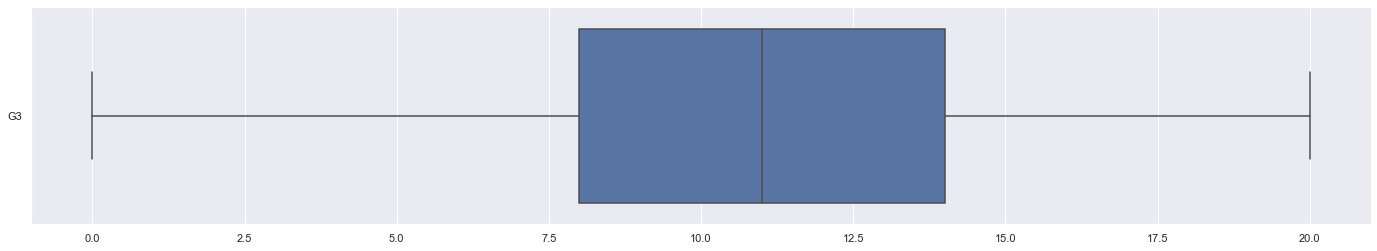

In [36]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = G3, orient = "h")

<AxesSubplot:ylabel='Count'>

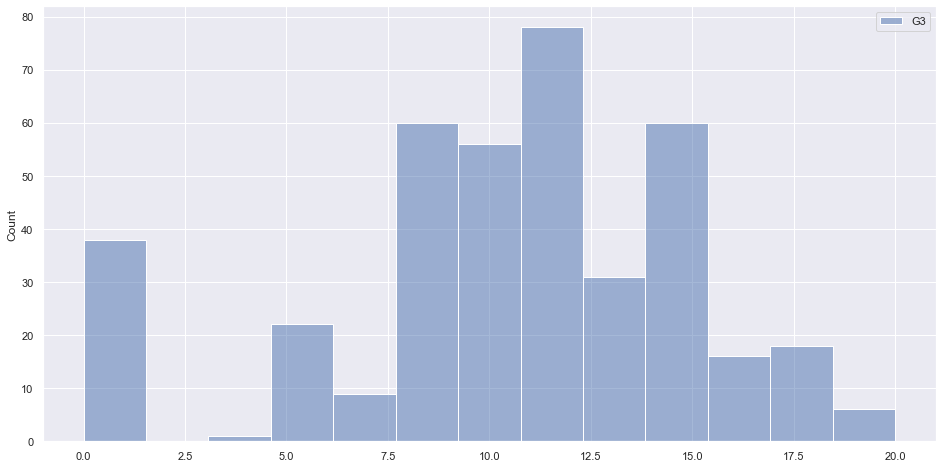

In [37]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = G3)

<AxesSubplot:ylabel='Density'>

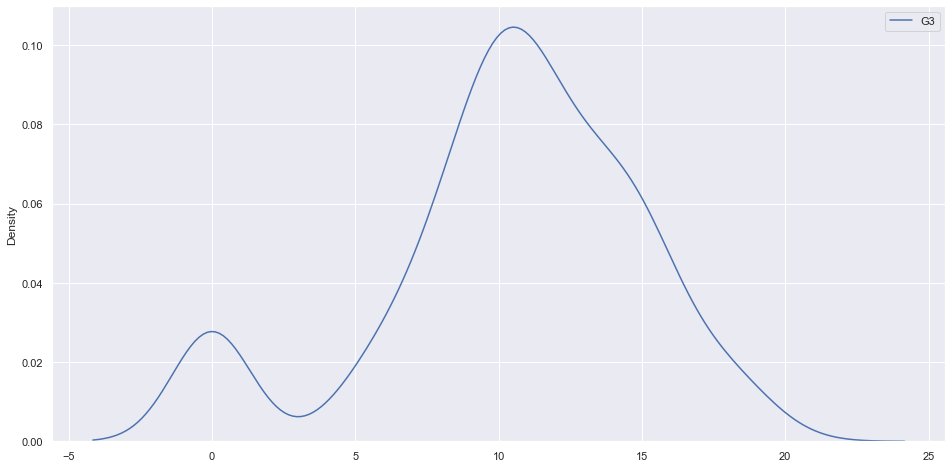

In [38]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = G3)

<AxesSubplot:ylabel='Count'>

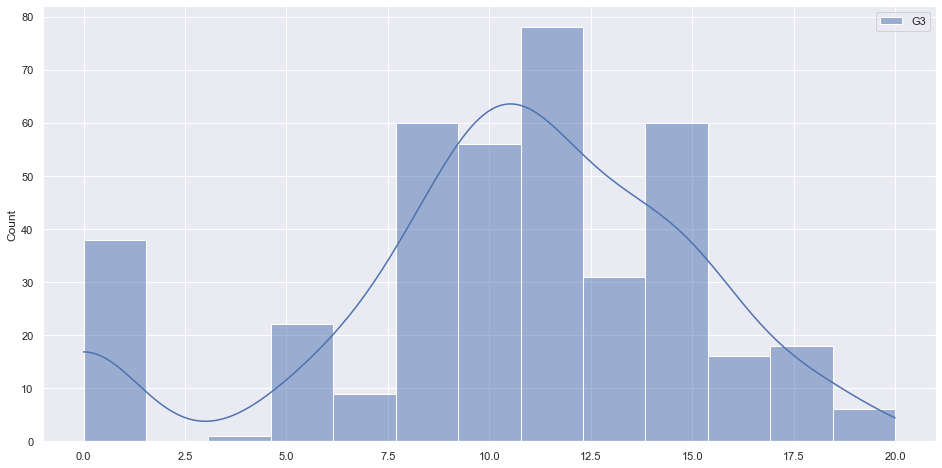

In [39]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = G3, kde = True)

<AxesSubplot:>

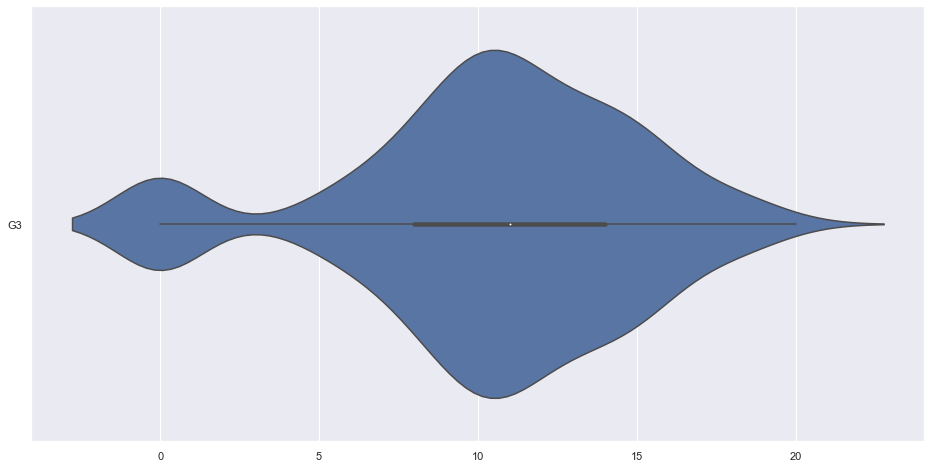

In [40]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = G3, orient = "h")

In [41]:
G3 = pd.DataFrame(mainData['G3'])
famrel = pd.DataFrame(mainData['famrel'])

In [42]:
famrel.describe()

,famrel
count,395.000000
mean,0.736076
std,0.224165
min,0.000000
25%,0.750000
50%,0.750000
75%,1.000000
max,1.000000


<AxesSubplot:>

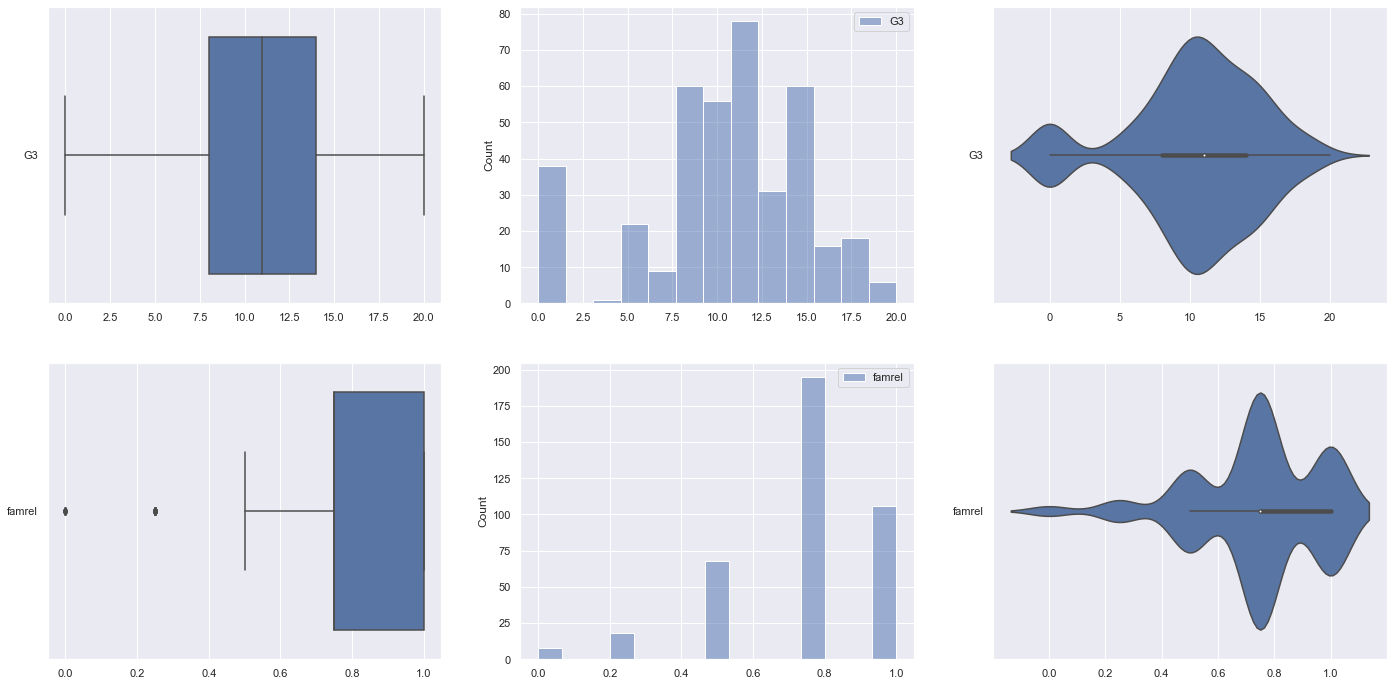

In [43]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = G3, orient = "h", ax = axes[0,0])
sb.histplot(data = G3, ax = axes[0,1])
sb.violinplot(data = G3, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = famrel, orient = "h", ax = axes[1,0])
sb.histplot(data = famrel, ax = axes[1,1])
sb.violinplot(data = famrel, orient = "h", ax = axes[1,2])

In [44]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([famrel, G3], axis = 1).reindex(famrel.index)
jointDF

,famrel,G3
0,0.75,6
1,1.00,6
2,0.75,10
3,0.50,15
4,0.75,10
...,...,...
390,1.00,9
391,0.25,16
392,1.00,7
393,0.75,10


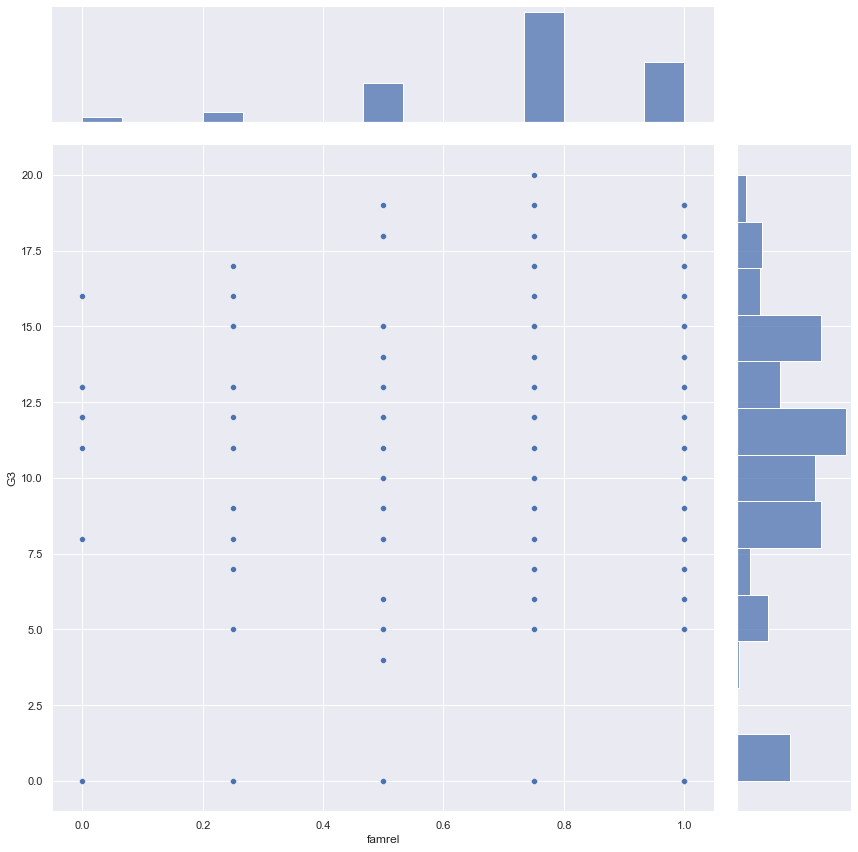

In [45]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "famrel", y = "G3", height = 12)

In [46]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,famrel,G3
famrel,1.000000,0.051363
G3,0.051363,1.000000


<AxesSubplot:>

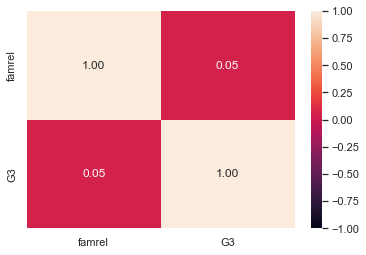

In [47]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [48]:
# Extract only the numeric data variables
numDF = pd.DataFrame(mainData[["G3", "famrel", "studytime", "health", "absences"]])

# Summary Statistics for all Variables
numDF.describe()

,G3,famrel,studytime,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.415190,0.736076,0.345148,0.638608,0.076118
std,4.581443,0.224165,0.279747,0.347576,0.106708
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.750000,0.000000,0.500000,0.000000
50%,11.000000,0.750000,0.333333,0.750000,0.053333
75%,14.000000,1.000000,0.333333,1.000000,0.106667
max,20.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

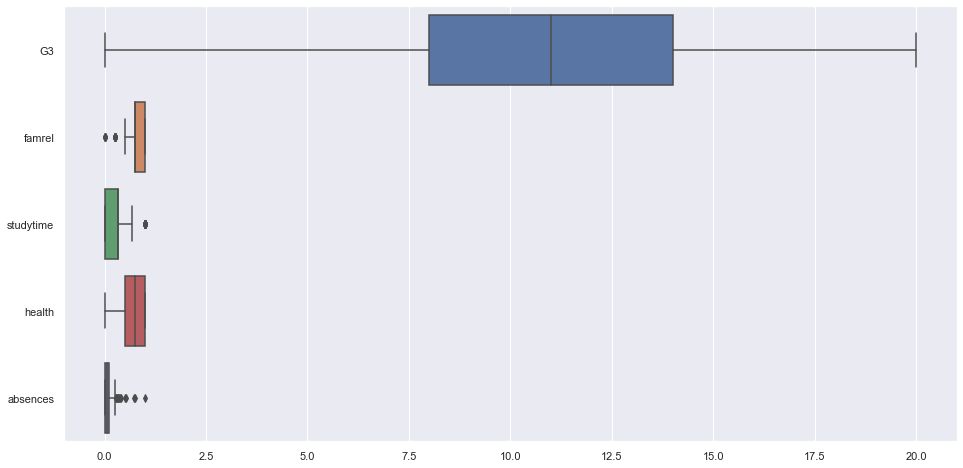

In [49]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF, orient = "h")

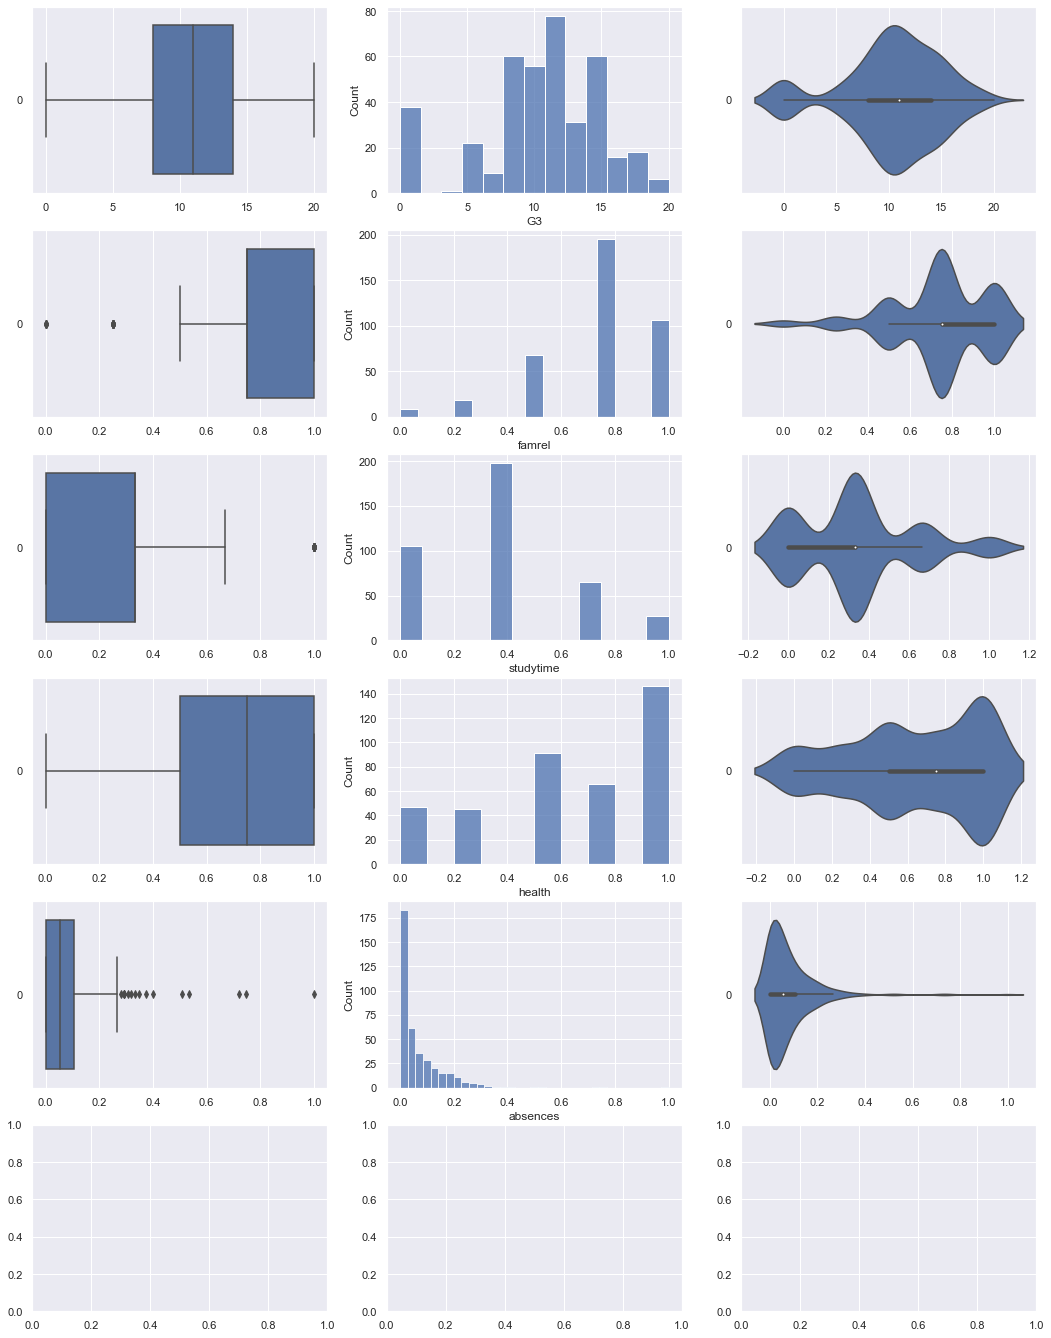

In [50]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [51]:
# Calculate the complete  correlation matrix
numDF.corr()

,G3,famrel,studytime,health,absences
G3,1.000000,0.051363,0.097820,-0.061335,0.034247
famrel,0.051363,1.000000,0.039731,0.094056,-0.044354
studytime,0.097820,0.039731,1.000000,-0.075616,-0.062700
health,-0.061335,0.094056,-0.075616,1.000000,-0.029937
absences,0.034247,-0.044354,-0.062700,-0.029937,1.000000


<AxesSubplot:>

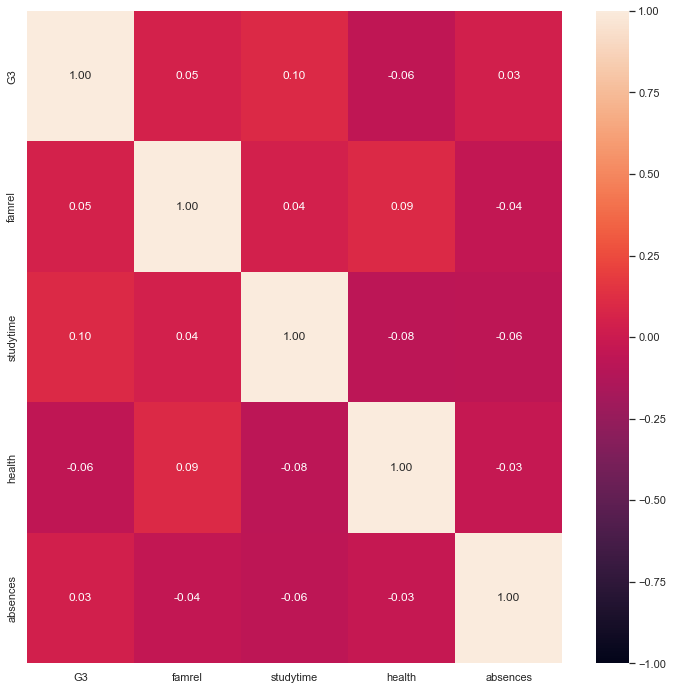

In [52]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

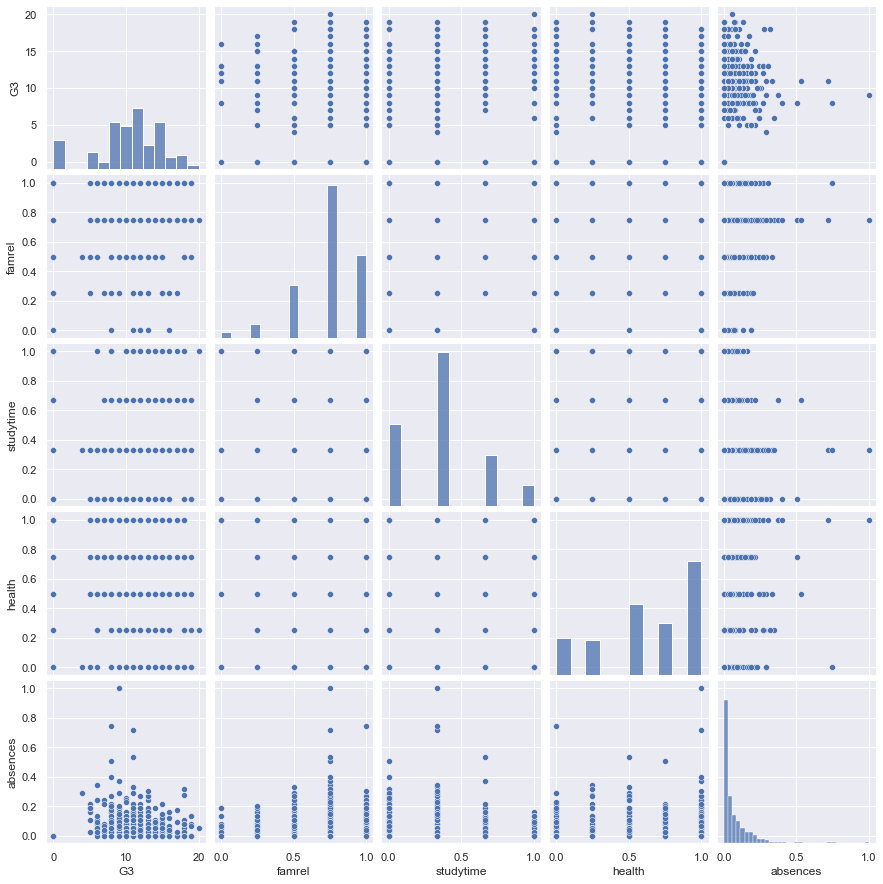

In [53]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

In [54]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [55]:
y = pd.DataFrame(mainData["G3"])  # Response
X = pd.DataFrame(mainData[["famrel", "studytime", "health", "absences"]])        # Predictor

In [56]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (296, 1) (296, 4)
Test Set  : (99, 1) (99, 4)


In [57]:
# Summary Statistics for Response
y_train.describe()

,G3
count,296.000000
mean,10.537162
std,4.698933
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


In [58]:
# Summary Statistics for Predictors
X_train.describe()

,famrel,studytime,health,absences
count,296.000000,296.000000,296.000000,296.000000
mean,0.739865,0.353604,0.636824,0.076261
std,0.228069,0.283179,0.347307,0.112104
min,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.500000,0.000000
50%,0.750000,0.333333,0.750000,0.053333
75%,1.000000,0.333333,1.000000,0.106667
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

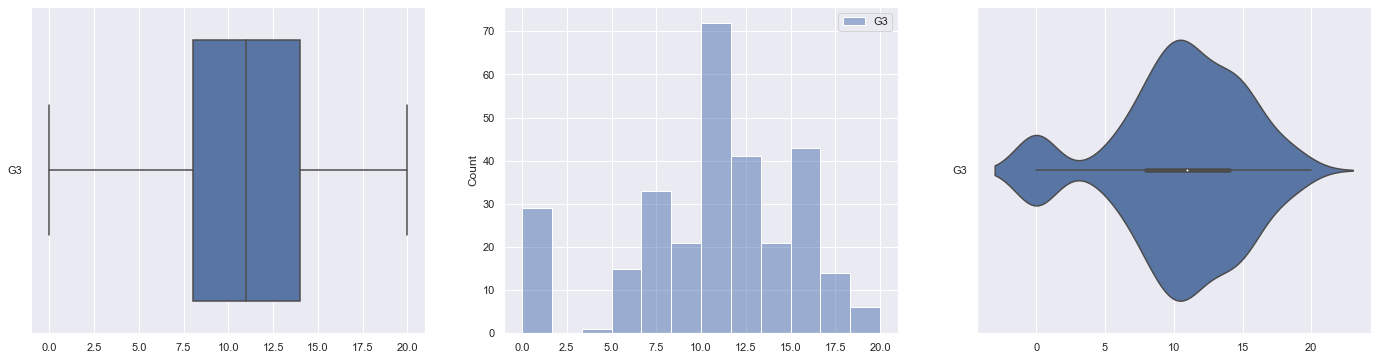

In [59]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

<AxesSubplot:>

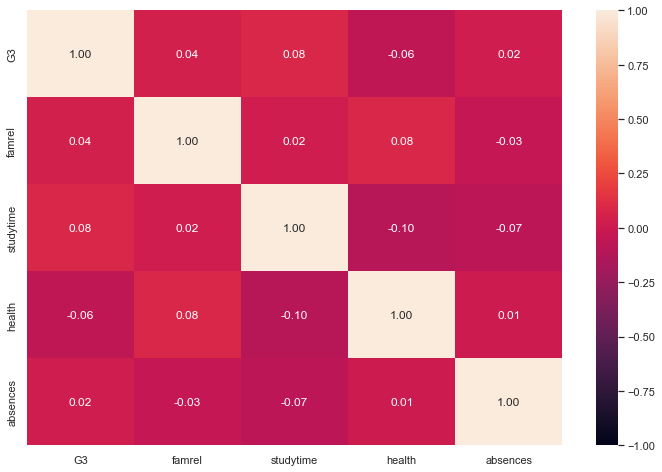

In [60]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

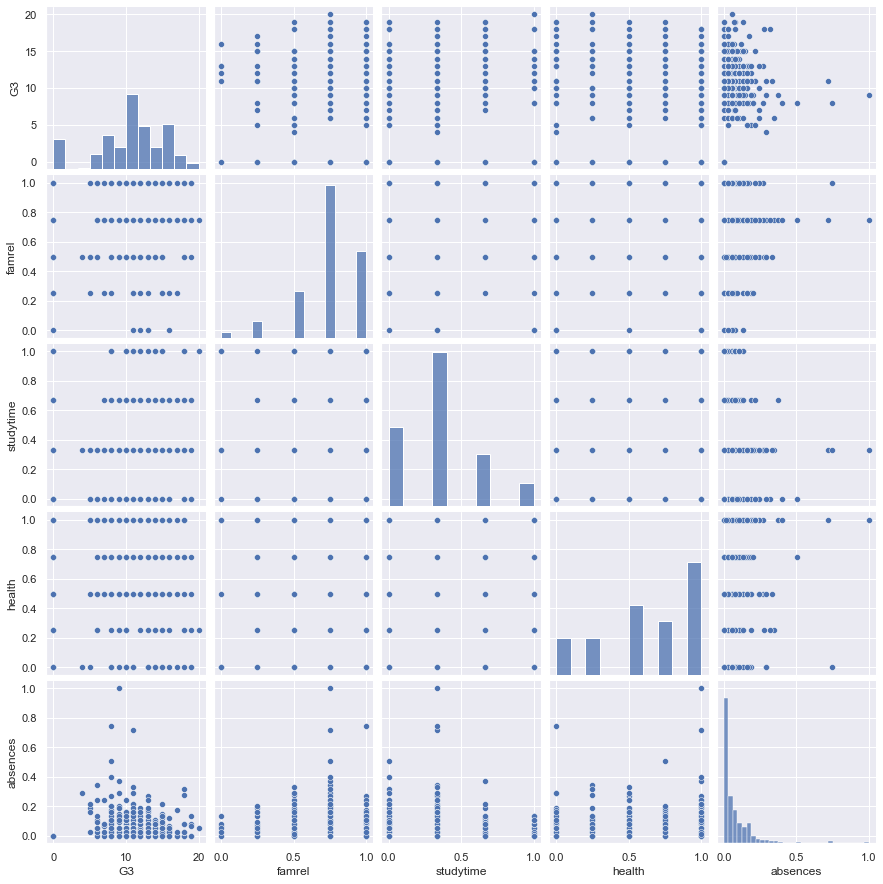

In [61]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

# Machine Learning Models

In [16]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,D
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,D
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,C
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,B
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,C


In [17]:
mainData.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
#convert binary data to 0's and 1's
categorical_features = [
    features for features in mainData.columns if mainData[features].dtype == 'O']
#print(len(categorical_features))
#mainData[categorical_features].head()

for feature in categorical_features:
    labels_ordered = mainData.groupby(
        [feature])['G3'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    mainData[feature] = mainData[feature].map(labels_ordered)

mainData[categorical_features].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,1,0,1,0,1,0,4,0,1,0,1,0,0,1,1,0,1,1
1,1,0,1,0,0,0,1,0,2,1,0,0,0,0,1,1,1,1
2,1,0,1,1,0,0,1,3,1,0,1,1,0,1,1,1,1,2
3,1,0,1,0,0,4,2,1,1,1,0,1,1,1,1,1,0,3
4,1,0,1,0,0,1,1,1,2,1,0,1,0,1,1,0,1,2


# 1) Linear Regression

Intercept of Regression 	: b =  [2.56564858]
Coefficients of Regression 	: a =  [[ 0.42568451  0.35703087 -0.16440205  0.01334064  1.92915605  0.34067659
   0.47746606  0.20042031  0.21794378 -0.56563042  2.72615099]]

    Predictors  Coefficients
0       famrel      0.425685
1    studytime      0.357031
2       health     -0.164402
3     absences      0.013341
4    schoolsup      1.929156
5         Medu      0.340677
6         Fedu      0.477466
7         Mjob      0.200420
8         Fjob      0.217944
9   traveltime     -0.565630
10      higher      2.726151



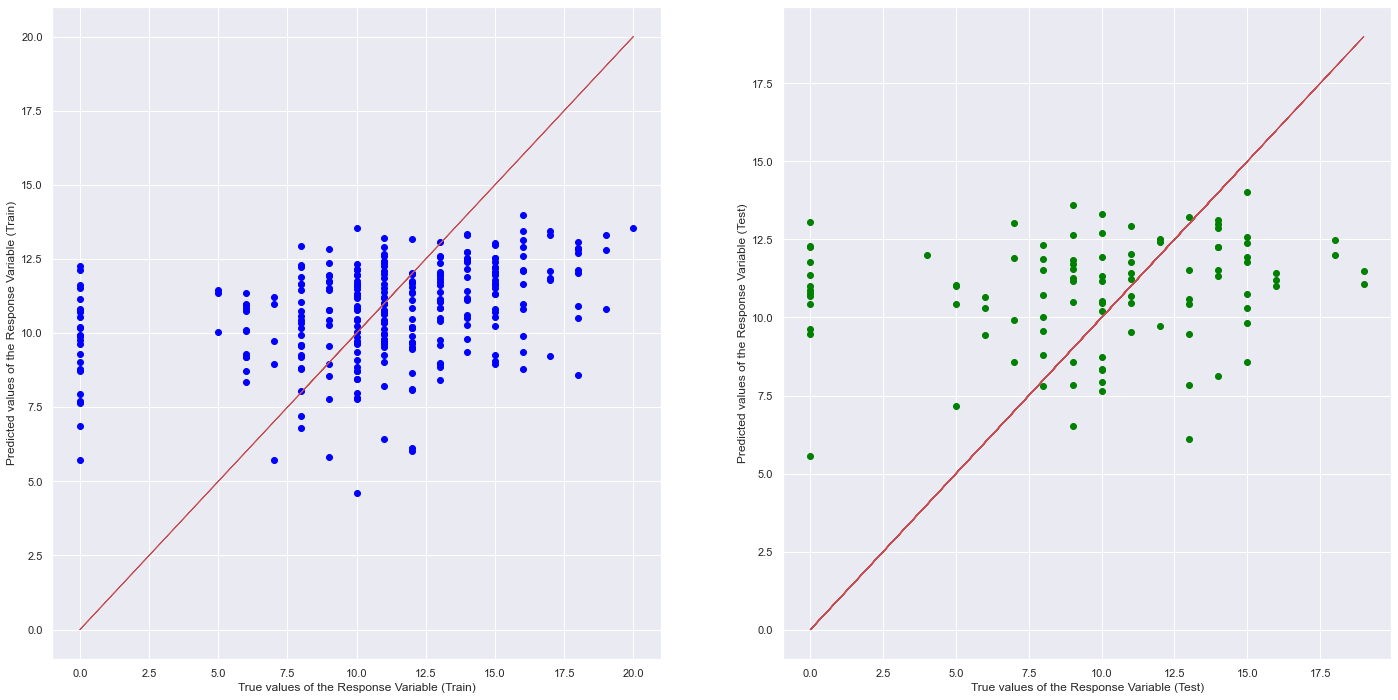

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13534584662723959
Mean Squared Error (MSE) 	: 16.93156376047356

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.08169700878444663
Mean Squared Error (MSE) 	: 25.98611238713734



In [19]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
response= ["G3"]
#predictors = ["famrel","studytime","health"]
predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]

y = pd.DataFrame(mainData[response])
X = pd.DataFrame(mainData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# 2) Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4797297297297297

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.37373737373737376



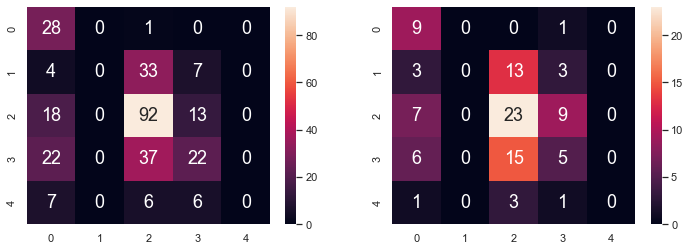

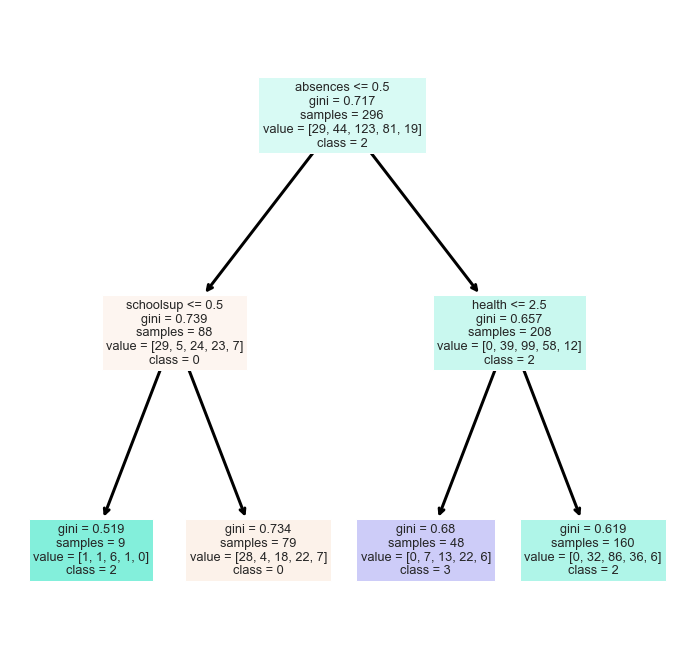

In [20]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

response= ["grades"]
#predictors = ["famrel","studytime","health","absences"]
#predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]


# Extract Response and Predictors
y = pd.DataFrame(mainData[response])
X = pd.DataFrame(mainData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5101351351351351

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3333333333333333



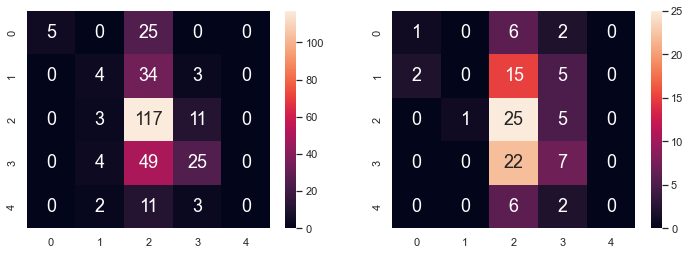

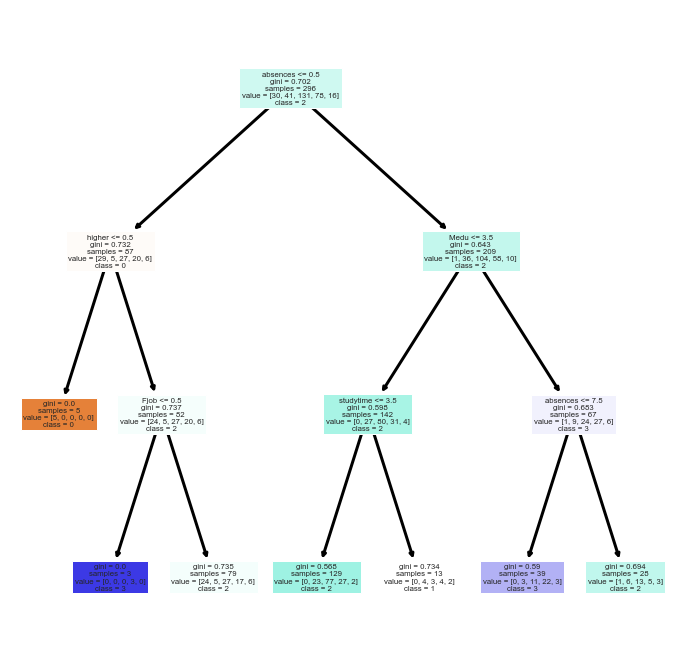

In [21]:
# Predict Data
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
response= ["grades"]
#predictors = ["famrel","studytime","health","absences"]
#predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]

y = pd.DataFrame(mainData[response])
X = pd.DataFrame(mainData[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [22]:
# Extract Pokemons for Prediction
mainData_pred = mainData[mainData["id"].isin([1,2,3,4,5,6,7,8,9,10])]
mainData_pred

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,1,1,0,18,1,0,1,4,4,0,...,3,4,1,1,3,6,5,6,6,1
1,2,1,0,17,1,0,0,1,1,0,...,3,3,1,1,3,4,5,5,6,1
2,3,1,0,15,1,1,0,1,1,0,...,3,2,2,3,3,10,7,8,10,2
3,4,1,0,15,1,0,0,4,2,4,...,2,2,1,1,5,2,15,14,15,3
4,5,1,0,16,1,0,0,3,3,1,...,3,2,1,2,5,4,6,10,10,2
5,6,1,1,16,1,1,0,4,3,2,...,4,2,1,2,5,10,15,15,15,3
6,7,1,1,16,1,1,0,2,2,1,...,4,4,1,1,3,0,12,12,11,2
7,8,1,0,17,1,0,1,4,4,1,...,1,4,1,1,1,6,6,5,6,1
8,9,1,1,15,1,1,1,3,2,2,...,2,2,1,1,1,0,16,18,19,4
9,10,1,1,15,1,0,0,3,4,1,...,5,1,1,1,5,0,14,15,15,3


In [23]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(mainData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array([3, 2, 2, 3, 2, 2, 2, 3, 2, 2], dtype=int64)

In [24]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["predGrades"], index = mainData_pred.index)
mainData_acc = pd.concat([mainData_pred[["id", "grades"]], y_pred], axis = 1)

mainData_acc

,id,grades,predGrades
0,1,1,3
1,2,1,2
2,3,2,2
3,4,3,3
4,5,2,2
5,6,3,2
6,7,2,2
7,8,1,3
8,9,4,2
9,10,3,2


# 3) Random Forest Regression

In [25]:
#mainData = pd.read_csv('processedmath.csv')
#X=mainData.drop(['G1','G2','G3_Grade','grades','school','sex','age'],axis = 1)
X = pd.DataFrame(mainData[predictors]) 
y = mainData['G3']
X.shape


(395, 11)

In [26]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(316, 11) (79, 11) (316,) (79,)


In [27]:
#Random Forest Model (import)
from sklearn.ensemble import RandomForestRegressor

#Instantiation of the model
model = RandomForestRegressor(n_estimators = 20, random_state = 20)

In [28]:
#Fitting model
G3_rf = model.fit(X_train,y_train)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
print('The training r_sq is:  %.2f'% G3_rf.score(X_train,y_train))

The training r_sq is:  0.85


In [33]:
ytrain_pred=G3_rf.predict(X_train)
#print('THE MAE is %.2f'% mean_absolute_error(y_train, ytrain_pred))
print('THE MSE is %.2f'% mean_squared_error(y_train, ytrain_pred))
#print('THE RMSE is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
#print('THE EVS is %.2f'% explained_variance_score(y_train, ytrain_pred))


THE MSE is 3.21


In [34]:
y_test_pred=G3_rf.predict(X_test)
print(y_test_pred[:10])
print('THE r_sq is %.2f'% r2_score(y_train, ytrain_pred))

[ 9.85  4.9   2.65 12.4  10.8  11.3  12.65  9.8   9.55 11.6 ]
THE r_sq is 0.85


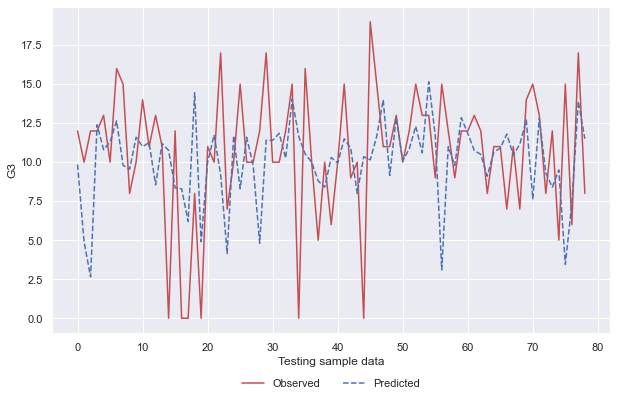

In [36]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))

plt.plot(x_ax,y_test,label='Observed',color ='r',linestyle ='-')
plt.plot(x_ax,y_test_pred,label='Predicted',color ='b',linestyle ='--')
plt.ylabel('G3')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2), loc = 'lower center',ncol= 2, frameon = False)
plt.show()

D:\SchoolStuff\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


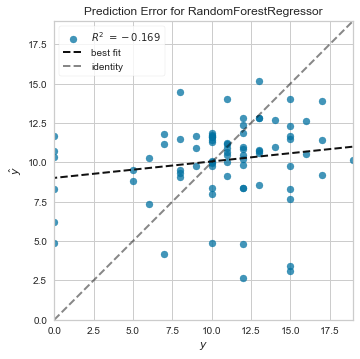

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
#Plot prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(G3_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

D:\SchoolStuff\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


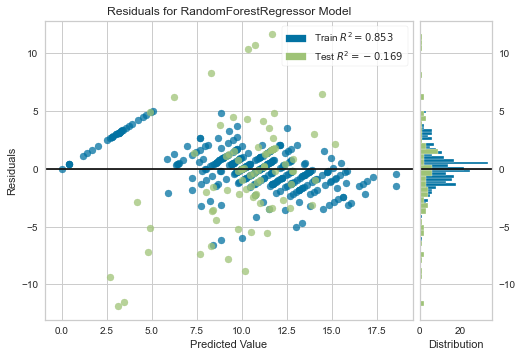

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
#Plot the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(G3_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [39]:
#The k-fold CV
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(G3_rf,X_train,y_train, scoring = 'neg_mean_squared_error',cv =10)
seed = 7
score_train

array([-14.99459687, -16.05750488, -23.92187988, -23.43263889,
       -25.36377658, -15.50756076, -31.74708208, -19.2996259 ,
       -14.68704176, -24.62196237])

In [40]:
#The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

20.963366997437838


In [41]:
#The testing model CV
score_test = cross_val_score(G3_rf, X_test,y_test,scoring='neg_mean_squared_error',cv=10)
score_train

array([-14.99459687, -16.05750488, -23.92187988, -23.43263889,
       -25.36377658, -15.50756076, -31.74708208, -19.2996259 ,
       -14.68704176, -24.62196237])

In [42]:
#The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

20.963366997437838


In [43]:
#Random Forest Feature Ranking
from sklearn.pipeline import Pipeline
f_list=list(X.columns)
f_importance = pd.Series(G3_rf.feature_importances_,index=f_list).sort_values(ascending=False)
print(f_importance)

absences      0.191357
Medu          0.113633
health        0.098679
Mjob          0.098586
Fedu          0.091820
famrel        0.090481
studytime     0.089127
Fjob          0.088725
traveltime    0.055791
higher        0.045639
schoolsup     0.036162
dtype: float64


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
XGBoost Regression Model
<a class="anchor" id="1"></a> 

In [3]:
# Import NumPy and Pandas libraries

import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from scipy.stats import uniform

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Import dataset
df = pd.read_csv('processedmath.csv')

# Make a copy of the dataframe
df_copy = df.copy()


In [4]:
dfX = df.iloc[:, 0:(len(df.columns)-4)] # Features
dfy = df.G3 # Target variable
print(dfX.shape)
print(type(dfX))
print(dfy.shape)
print(type(dfy))

(395, 32)
<class 'pandas.core.frame.DataFrame'>
(395,)
<class 'pandas.core.series.Series'>


In [5]:
# Extract the column names from the two datasets
col_names = list(dfX.columns)
col_names.append(dfy.name)
print(col_names)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [6]:
# Conversion from Pandas Dataframe to NumPy Array
X = dfX.values
y = dfy.values
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0  0 18 ...  6  5  6]
 [ 0  0 17 ...  4  5  5]
 [ 0  0 15 ... 10  7  8]
 ...
 [ 1  1 21 ...  3 10  8]
 [ 1  1 18 ...  0 11 12]
 [ 1  1 19 ...  5  8  9]]


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=2)
#X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25)

xgbR = XGBRegressor(n_estimators = 20, learning_rate = 0.1)
xgbR.fit(X_train, y_train.ravel())
test_mse_before_tune =  mean_squared_error(xgbR.predict(X_test), y_test)
train_mse_before_tune = mean_squared_error(xgbR.predict(X_train), y_train)

print('***Original Model***')
print('the training mean squared error is: ', train_mse_before_tune)
print('the testing mean squared error is: ', test_mse_before_tune)

***Original Model***
the training mean squared error is:  2.594534222621698
the testing mean squared error is:  3.586443950543177


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
K-Fold Cross Validation
<a class="anchor" id="1"></a> 

In [8]:
results = cross_validate(xgbR, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train score: ', results['train_score'])
print('test score: ', results['test_score'])

train score:  [-2.43194634 -2.56662208 -2.5436719  -2.64672987 -2.62403549]
test score:  [-5.76417453 -7.08426513 -4.4863901  -5.57538117 -5.65648791]


In [9]:
print('***Original Model***')
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

***Original Model***
cross val training mean_squared_error is: 2.562601136674392
cross val testing mean_squared_error is: 5.713339766111601


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
(Tuning #1) Statsmodel Ordinary Least Squares
<a class="anchor" id="1"></a> 

In [10]:
#The statsmodel.api provides key summary statistics
#The lm2 model refers to statsmodel.api model
#Add a constant to the X_train dataset and rename it as X_train_sm
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)
print(X_train_sm.shape)

#Create another model using statsmodel.api using the Ordinary Least Squares (OLS) method for the model
lm2 = sm.OLS(y_train, X_train_sm).fit()

lm2.summary()

[[ 1.  0.  0. ...  0.  9.  9.]
 [ 1.  0.  0. ...  2. 10. 10.]
 [ 1.  1.  1. ...  3. 14. 12.]
 ...
 [ 1.  0.  0. ...  2.  8.  6.]
 [ 1.  0.  0. ...  4. 14. 14.]
 [ 1.  0.  0. ...  0.  6.  7.]]
(296, 33)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     42.35
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.39e-85
Time:                        23:15:27   Log-Likelihood:                -608.89
No. Observations:                 296   AIC:                             1284.
Df Residuals:                     263   BIC:                             1406.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8209      2.470     -0.332      0.740      -5.685       4.043
x1             0.6755      0.434      1.558      0.120      -0.178       1.529
x2             0.0347      0.284      0.122      0.903      -0.525       0.595
x3            -0.2335      0.119     -1.965      0.051      -0.468       0.001
x4             0.0361      0.345      0.105      0.917      -0.643       0.715
x5            -0.1970      0.283     -0.697      0.486      -0.754       0.360
x6             0.0669      0.395      0.169      0.866      -0.712       0.846
x7             0.1236      0.150      0.822      0.412      -0.172       0.420
x8             0.0224      0.152      0.147      0.883      -0.277       0.322
x9             0.0203      0.090      0.225      0.822      -0.158       0.198
x10            0.0461      0.103      0.447      0.655      -0.157       0.249
x11            0.1003      0.129      0.775      0.439      -0.155       0.355
x12           -0.2877      0.220     -1.305      0.193      -0.722       0.146
x13            0.1525      0.191      0.800      0.425      -0.223       0.528
x14           -0.1223      0.169     -0.724      0.469      -0.455       0.210
x15            0.2386      0.207      1.151      0.251      -0.170       0.647
x16            0.5433      0.381      1.427      0.155      -0.206       1.293
x17            0.0647      0.273      0.237      0.813      -0.472       0.602
x18            0.0567      0.274      0.207      0.836      -0.483       0.597
x19           -0.3451      0.251     -1.376      0.170      -0.839       0.149
x20           -0.4850      0.332     -1.460      0.145      -1.139       0.169
x21            0.1258      0.613      0.205      0.838      -1.082       1.333
x22           -0.0577      0.331     -0.174      0.862      -0.709       0.594
x23           -0.3177      0.265     -1.199      0.232      -0.839       0.204
x24            0.3168      0.138      2.299      0.022       0.046       0.588
x25            0.1032      0.130      0.792      0.429      -0.154       0.360
x26           -0.0074      0.132     -0.056      0.956      -0.268       0.253
x27           -0.1853      0.202     -0.918      0.359      -0.583       0.212
x28            0.1586      0.139      1.143      0.254      -0.114       0.432
x29            0.0903      0.087      1.038      0.300      -0.081       0.262
x30            0.0424      0.016      2.726      0.007       0.012       0.073
x31            0.2125      0.071      2.991      0.003       0.073       0.352
x32            0.9649      0.061     15.801      0.000       0.845       1.085
==============================================================================
Omnibus:                      129.071   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.604
Sk

In [11]:
#Using important features (P < 0.05) to evaluate the model
dfX_new = df[['famrel', 'absences', 'G1', 'G2']]
dfy_new = df.G3
col_names = list(dfX_new.columns)
col_names.append(dfy_new.name)
print(col_names)
X = dfX_new.values
y = dfy_new.values

X_train,X_test,y_train,y_test=train_test_split(X, y.ravel(), test_size=0.25, random_state=2)
#X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25)

['famrel', 'absences', 'G1', 'G2', 'G3']


In [12]:
xgbR_new = XGBRegressor(n_estimators = 20, learning_rate = 0.1)
xgbR_new.fit(X_train, y_train.ravel())

print('***New Model***')
print('Training MSE is: ',  mean_squared_error(xgbR_new.predict(X_train), y_train))
print('Testing MSE is: ', mean_squared_error(xgbR_new.predict(X_test), y_test))

***New Model***
Training MSE is:  3.6651904351041913
Testing MSE is:  3.7391792226623606


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
(Tuning #2) Grid Search
<a class="anchor" id="1"></a> 

In [13]:
mean_squared_error(xgbR_new.predict(X_test), y_test)
#DTR = DecisionTreeRegressor(max_depth = 4, min_samples_leaf =1)
xgbR_new = XGBRegressor()
param_grid = {
    "n_estimators": range (10,100),
    "learning_rate": [0.01, 0.03, 0.05, 0.09, 0.1, 0.2],
    "max_depth": [2,4,6,8]
}

gs = GridSearchCV(xgbR_new, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)

2.9543059058966543
{'learning_rate': 0.09, 'max_depth': 2, 'n_estimators': 62}


In [14]:
xgbR_final = XGBRegressor(n_estimators = 62,
                          learning_rate = 0.09,
                          max_depth = 2)

xgbR_final.fit(X_train, y_train.ravel())

preds = xgbR_final.predict(X_test)

print('***Final Model***')
print('Training MSE after tuning is: ', mean_squared_error(xgbR_final.predict(X_train), y_train))
print('Testing MSE after tuning is: ', mean_squared_error(xgbR_final.predict(X_test), y_test))
print('The testing MSE has improved by ', train_mse_before_tune-mean_squared_error(xgbR_final.predict(X_train), y_train), 'after tuning.')
print('The testing MSE has improved by ', test_mse_before_tune-mean_squared_error(xgbR_final.predict(X_test), y_test), 'after tuning.')

***Final Model***
Training MSE after tuning is:  2.4216796033716963
Testing MSE after tuning is:  1.3089113450017726
The testing MSE has improved by  0.17285461925000156 after tuning.
The testing MSE has improved by  2.2775326055414045 after tuning.


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
K-Folds Cross Validation (Final Model)
<a class="anchor" id="1"></a> 

In [15]:
results = cross_validate(xgbR_final, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train score: ', results['train_score'])
print('test score: ', results['test_score'])

train score:  [-2.06785415 -2.15221592 -2.23682383 -1.99879505 -1.79611124]
test score:  [-2.66085946 -2.36243301 -1.74940083 -3.51992089 -4.43500323]


In [16]:
print('***Final Model***')
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
cross val training mean_squared_error is: 2.0503600409315585
cross val testing mean_squared_error is: 2.945523483861085
